In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv('Student_Performance.csv')

In [26]:
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [27]:
dataset.drop_duplicates()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [28]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [29]:
X

array([[7, 99, 'Yes', 9, 1],
       [4, 82, 'No', 4, 2],
       [8, 51, 'Yes', 7, 2],
       ...,
       [6, 83, 'Yes', 8, 5],
       [9, 97, 'Yes', 7, 0],
       [7, 74, 'No', 8, 1]], dtype=object)

In [30]:
y

array([91., 65., 45., ..., 74., 95., 64.])

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
X[:,2] = le.fit_transform(X[:,2])

In [35]:
X

array([[7, 99, 1, 9, 1],
       [4, 82, 0, 4, 2],
       [8, 51, 1, 7, 2],
       ...,
       [6, 83, 1, 8, 5],
       [9, 97, 1, 7, 0],
       [7, 74, 0, 8, 1]], dtype=object)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [41]:
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)

In [47]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[50.45 53.  ]
 [53.09 50.  ]
 [78.25 80.  ]
 ...
 [64.57 66.  ]
 [25.9  27.  ]
 [18.83 21.  ]]


In [48]:
print(regressor.coef_)

[2.85 1.02 0.67 0.48 0.19]


In [49]:
print(regressor.intercept_)

-34.07520822521337


In [50]:
y_test.shape

(2000,)

Text(0, 0.5, 'Sales')

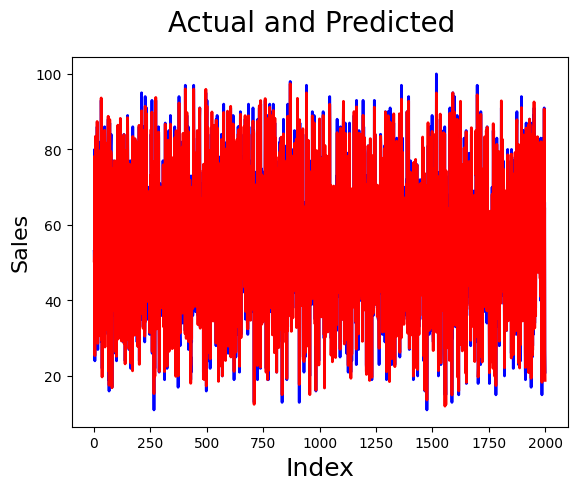

In [51]:
c = [i for i in range(1,2001,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)  

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [53]:
print('r_square_value :',r_squared)
print("Mean Absolute Error (MAE):", mae)

r_square_value : 0.9880686410711422
Mean Absolute Error (MAE): 1.622970832971088


##### R-squared is 0.988, indicating that approximately 98.80% of the variance in the target variable is explained by the model.
##### MAE of 1.62 means, on average, model's predictions are off by approximately 1.62 units from the actual values.